<a href="https://colab.research.google.com/github/H3LLSCR34M/Pokedex/blob/master/Pokedex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=188a3c0200ae288fa7c44cf02954dad60b14899a38b15de71b24a4aff0208416
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  |     Proc size: 162.0 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total     11441MB


In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!sudo apt install unzip
!pip install keras
!pip install skimage
!pip install sklearn
import os

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
  Using cached https://files.pythonhosted.org/packages/3b/ee/edbfa69ba7b7d9726e634bfbeefd04b5a1764e9e74867ec916113eeaf4a1/skimage-0.0.tar.gz
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [ ]:
path = '/content/gdrive/My Drive/random/pokemon_dataset.zip'
print(os.listdir("/content/gdrive/My Drive/random"))

['DL_Photo_1.jpg', 'Web.JPG', 'Snk_Episode_50.mp4', 'spliced.mp4', 'random.jpg', 'INDIAN-LICENCE.png', 'DL_Photo_2.png', 'index.jpg', 'index2.jpg', 'index.crop.png', 'DL-cropped1.jpg', 'index2.crop.png', 'cropper.jpg', 'deskew.png', 'INDIAN-LICENCE-final.png', 'cropper.crop.png', 'pokemon_dataset.zip']


In [ ]:
#If zip File
!unzip /content/gdrive/My\ Drive/random/pokemon_dataset.zip -d /content/gdrive/My\ Drive/random/data 

Archive:  /content/gdrive/My Drive/random/pokemon_dataset.zip
  inflating: /content/gdrive/My Drive/random/data/images/images/abomasnow.png  
  inflating: /content/gdrive/My Drive/random/data/images/images/abra.png  
  inflating: /content/gdrive/My Drive/random/data/images/images/absol.png  
  inflating: /content/gdrive/My Drive/random/data/images/images/accelgor.png  
  inflating: /content/gdrive/My Drive/random/data/images/images/aegislash-blade.png  
  inflating: /content/gdrive/My Drive/random/data/images/images/aerodactyl.png  
  inflating: /content/gdrive/My Drive/random/data/images/images/aggron.png  
  inflating: /content/gdrive/My Drive/random/data/images/images/aipom.png  
  inflating: /content/gdrive/My Drive/random/data/images/images/alakazam.png  
  inflating: /content/gdrive/My Drive/random/data/images/images/alomomola.png  
  inflating: /content/gdrive/My Drive/random/data/images/images/altaria.png  
  inflating: /content/gdrive/My Drive/random/data/images/images/amaura.

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import skimage
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
import itertools
from pathlib import Path
import keras
from keras.utils import to_categorical
from sklearn.utils import shuffle

Using TensorFlow backend.


In [ ]:
def load_images_from_folder(folder):
    labels = []
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            labels.append(Path(filename).stem)
            images.append(img)
            height, width, depth = img.shape
            if depth is not 3:
              print(depth)
    return [images, labels]

In [ ]:
def augment_Images(images,labels):
  new_images = []
  new_labels = []
  j = 0
  for (img,name) in zip(images,labels):
    if j is 5:
      break
    j = j+1
    img = cv2.resize(img,(60,60))
    new_images.append(img)
    new_labels.append(name)
    for i in range(200):
      angle = random.randint(0,360)
      image = rotate(img,angle)
      a = random.randint(0,2)
      if a is 0:
        image = np.fliplr(image)
      if a is 1:
        image = np.flipud(image)
      image = random_noise(image);
      image = cv2.GaussianBlur(image, (5,5),0)
      new_images.append(image)
      new_labels.append(name)
  return  new_images,new_labels

['abomasnow', 'abra', 'absol', 'accelgor', 'aegislash-blade']
[0, 1, 2, 3, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

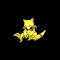

In [ ]:
from google.colab.patches import cv2_imshow
[images,labels] = load_images_from_folder("/content/gdrive/My Drive/random/data/images/images")
#labels = labels[0:5]
#images = images[0:5]
num_labels_names = labels
print(num_labels_names)
labels = [i for i in range(len(labels))]
print(labels)
[images,labels] = augment_Images(images,labels)
cv2_imshow(images[201])

In [ ]:
labels = to_categorical(labels, num_classes=len(num_labels_names))

In [ ]:
images = np.array(images)
labels = np.array(labels)
images, labels = shuffle(images,labels)

In [ ]:
import sklearn
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(images, labels, train_size=0.8, test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(20, kernel_size=30, activation='relu', input_shape=(60,60,3)))
model.add(Flatten())
model.add(Dense(len(num_labels_names), activation='softmax'))

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
counter = int(len(X_train)/5);
X_train1 = X_train[0:counter]
Y_train1 = Y_train[0:counter]
X_train2 = X_train[counter:counter*2]
Y_train2 = Y_train[counter:counter*2]
X_train3 = X_train[2*counter:counter*3]
Y_train3 = Y_train[2*counter:counter*3]
X_train4 = X_train[3*counter:counter*4]
Y_train4 = Y_train[3*counter:counter*4]
X_train5 = X_train[4*counter:]
Y_train5 = Y_train[4*counter:]
model.fit(X_train1, Y_train1, epochs=5)
model.fit(X_train2, Y_train2, epochs=5)
model.fit(X_train3, Y_train3, epochs=5)
model.fit(X_train4, Y_train4, epochs=5)
model.fit(X_train5, Y_train5, epochs=5)

Epoch 1/5
160/160 [==============================] - 6s 37ms/step - loss: 6.4637 - accuracy: 0.2250
Epoch 2/5
160/160 [==============================] - 0s 308us/step - loss: 1.1607 - accuracy: 0.4875
Epoch 3/5
160/160 [==============================] - 0s 290us/step - loss: 0.6561 - accuracy: 0.8562
Epoch 4/5
160/160 [==============================] - 0s 302us/step - loss: 0.4736 - accuracy: 0.8875
Epoch 5/5
160/160 [==============================] - 0s 303us/step - loss: 0.2546 - accuracy: 0.9937
Epoch 1/5
160/160 [==============================] - 0s 286us/step - loss: 0.3675 - accuracy: 0.9500
Epoch 2/5
160/160 [==============================] - 0s 280us/step - loss: 0.2256 - accuracy: 0.9750
Epoch 3/5
160/160 [==============================] - 0s 275us/step - loss: 0.1408 - accuracy: 0.9875
Epoch 4/5
160/160 [==============================] - 0s 276us/step - loss: 0.0802 - accuracy: 1.0000
Epoch 5/5
160/160 [==============================] - 0s 288us/step - loss: 0.0522 - accuracy

In [ ]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[3.3053882e-06, 9.9345571e-01, 3.8380437e-03, 4.0537470e-05,
        2.6623609e-03],
       [9.9581856e-01, 1.7860986e-09, 4.3817368e-04, 2.4254358e-04,
        3.5007559e-03],
       [2.5468838e-05, 1.6823893e-03, 9.4125462e-01, 5.6690447e-02,
        3.4702604e-04],
       [9.1098336e-04, 1.4571603e-03, 8.7494083e-02, 8.9674610e-01,
        1.3391634e-02]], dtype=float32)

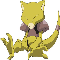

[0. 1. 0. 0. 0.]


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [3.3053882e-06, 9.9345571e-01, 3.8380437e-03, 4.0537470e-05,
        2.6623609e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00]], dtype=float32)

In [ ]:
path = "/content/gdrive/My Drive/random/pokemon_pic/external-content.duckduckgo.com.jpg"
path1 = "/content/gdrive/My Drive/random/pokemon_pic/external-content.duckduckgo.com1.jpg"
path2 = "/content/gdrive/My Drive/random/pokemon_pic/external-content.duckduckgo.com2.jpg"

abra1 = cv2.imread(path)
abra1 = cv2.resize(abra1,(60,60))
abra2 = cv2.imread(path1)
abra2 = cv2.resize(abra2,(60,60))
accel = cv2.imread(path)
accel = cv2.resize(accel,(60,60))
cv2_imshow(abra1)
A = []
A.append(abra1)
A.append(X_test[0])
print(Y_test[0])
A.append(abra2)
A.append(accel)
A = np.array(A)
model.predict(A)